# Problem Statement or Requirement:
A client’s requirement is, he wants to predict the insurance charges based on 
the several parameters. The Client has provided the dataset of the same.
As a data scientist, you have to develop a model which will predict the 
insurance charges.

In [46]:
import pandas as pd

In [47]:
data=pd.read_csv('insurance.csv')

# First 5 Rows

In [48]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


# Last 5 Rows

In [49]:
data.tail()

,age,sex,bmi,children,smoker,charges
1333,50,male,30.97,3,no,10600.5483
1334,18,female,31.92,0,no,2205.9808
1335,18,female,36.85,0,no,1629.8335
1336,21,female,25.80,0,no,2007.9450
1337,61,female,29.07,0,yes,29141.3603


#  Total Rows and Columns

In [50]:
data.shape

(1338, 6)

# Info about the dataset

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


# Check any null value

In [52]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

# Describe about data

In [53]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Convert String to Number

In [54]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [55]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [56]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,yes,16884.92400
1,18,1,33.770,1,no,1725.55230
2,28,1,33.000,3,no,4449.46200
3,33,1,22.705,0,no,21984.47061
4,32,1,28.880,0,no,3866.85520


In [57]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [58]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


# Store Matrix in X and Response in Vector y

In [59]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [60]:
X=data.drop(['charges'],axis=1)

In [61]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [62]:
y=data['charges']

In [63]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Train or Test Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X_train

,age,sex,bmi,children,smoker
560,46,0,19.950,2,0
1285,47,0,24.320,0,0
1142,52,0,24.860,0,0
969,39,0,34.320,5,0
486,54,0,21.470,3,0
...,...,...,...,...,...
1095,18,0,31.350,4,0
1130,39,0,23.870,5,0
1294,58,1,25.175,0,0
860,37,0,47.600,2,1


In [67]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

# Import the Models

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [69]:
lr= LinearRegression()
lr.fit(X_train,y_train)
svm= SVR()
svm .fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gr= GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

# Prediction on Test Data

In [70]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [71]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8554.817116,9546.725504,11115.950837,10427.990349
887,5272.17580,6973.587467,9487.935664,4964.522464,5878.929609
890,29330.98315,36798.604161,9651.574870,28254.520746,27846.773368
1293,9301.89355,9417.882823,9553.932765,9488.762908,9613.279761
259,33750.29180,26871.680311,9413.992629,34402.633990,33859.024038
...,...,...,...,...,...
109,47055.53210,39220.995889,9651.905055,47352.106509,45476.088187
575,12222.89830,11695.634124,9627.798040,12220.326101,12407.271814
535,6067.12675,7253.598675,9500.111686,5724.556734,6417.948132
543,63770.42801,40950.539904,9605.947203,46554.026981,48274.630065


# Compare the performance visually

In [72]:
import matplotlib.pyplot as plt

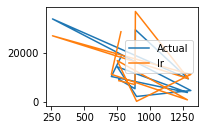

In [73]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()

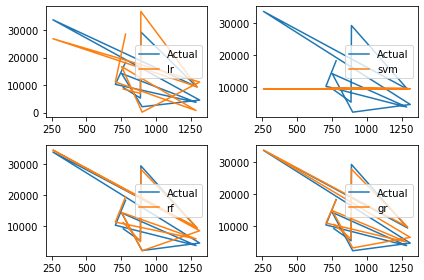

In [74]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()


plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')

plt.tight_layout()
plt.legend()

# Evaluating the algorithm

In [75]:
from sklearn import metrics

In [76]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [77]:
print(score1,score2,score3,score4)

0.7811302113434095 -0.07222971234901521 0.8550816689500451 0.8785240976380629


In [78]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [79]:
print(s1,s2,s3,s4)

4213.484797807137 8590.133628716292 2514.950331110977 2424.2268849955017


# Predict for new customer

In [80]:
data={'age':40,
      'sex':1,
    'bmi':40.30,
     'children':4,
     'smoker':1
     }
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker
0,40,1,40.3,4,1


In [81]:
new_pred=gr.predict(df)
print(new_pred)

[43731.38207886]


In [82]:
gr= GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

# Save model using Joblib

In [83]:
import joblib

In [84]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [85]:
model=joblib.load('model_joblib_gr')

In [86]:
model.predict(df)

array([43257.52633764])

# GUI

In [87]:
from tkinter import*

In [88]:
import joblib

In [ ]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get()) 
    p5=float(e5.get())
    
    model=joblib.load('model_joblib_gr')
    result=model.predict([[p1,p2,p3,p4,p5]])
    Label(master,text="Insurance Cost").grid(row=6)
    Label(master,text=result).grid(row=7)

master=Tk()
master.title("Insurance Cost Prediction")
label=Label(master,text="Insurance Cost Prediction",bg="black",fg="white").grid(row=0,columnspan=2)
Label(master,text="Enter Your age").grid(row=1)
Label(master,text="Male or Female [1/0]").grid(row=2)
Label(master,text="Enter Your BMI value").grid(row=3)
Label(master,text="Enter Number of children").grid(row=4)
Label(master,text="Smoker Yes/No [1/0]").grid(row=5)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()